In [1]:
# What version of Python do you have?
import sys
import os
import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf
import numpy as np
from datetime import datetime
import os
from skimage.restoration import (denoise_wavelet, estimate_sigma)
from pathlib import Path
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, Sequential
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix, plot_confusion_matrix
from PIL import Image
%matplotlib inline

print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Tensor Flow Version: 2.6.0
Keras Version: 2.6.0

Python 3.7.11 (default, Jul 27 2021, 09:42:29) [MSC v.1916 64 bit (AMD64)]
Pandas 1.3.3
Scikit-Learn 0.24.2
GPU is available


In [2]:
resnet152_input_shape = (224, 224)
inceptionV3_input_shape = (299, 299)
batch_size = 1
print(os.getcwd())
chb01_path = "../../windows"
labels = [item for item in os.listdir(chb01_path)]
labels = np.array(labels)
labels = labels[0:]
print(labels.shape)
labels

c:\Users\thoma\Desktop\speciale\DeepLearning_Master\models\evaluate
(4,)


array(['Interictal', 'Preictal_One', 'Preictal_Two', 'Seizure'],
      dtype='<U12')

In [3]:
test_df = pd.read_csv("../tester.csv")

In [4]:
for i, row in test_df.iterrows():
    val = str(row.filename)
    print(val)
    test_df.at[i,'filename'] = val.split(",", 1)[0]

../../windows/Seizure/chb10_27_10_F7-T7_23-42-10.png, Seizure/chb10_27_10_FP1-F3_23-42-10.png, Seizure/chb10_27_10_FP1-F7_23-42-10.png, Seizure/chb10_27_10_P3-O1_23-42-10.png, Seizure/chb10_27_10_P7-O1_23-42-10.png, Seizure/chb10_27_10_T7-P7_23-42-10.png, Seizure/chb10_27_11_C3-P3_23-42-12.png, Seizure/chb10_27_11_F3-C3_23-42-12.png
../../windows/Seizure/chb10_27_11_F7-T7_23-42-12.png, Seizure/chb10_27_11_FP1-F3_23-42-12.png, Seizure/chb10_27_11_FP1-F7_23-42-12.png, Seizure/chb10_27_11_P3-O1_23-42-12.png, Seizure/chb10_27_11_P7-O1_23-42-12.png, Seizure/chb10_27_11_T7-P7_23-42-12.png, Seizure/chb10_27_12_C3-P3_23-42-14.png, Seizure/chb10_27_12_F3-C3_23-42-14.png
../../windows/Seizure/chb10_27_12_F7-T7_23-42-14.png, Seizure/chb10_27_12_FP1-F3_23-42-14.png, Seizure/chb10_27_12_FP1-F7_23-42-14.png, Seizure/chb10_27_12_P3-O1_23-42-14.png, Seizure/chb10_27_12_P7-O1_23-42-14.png, Seizure/chb10_27_12_T7-P7_23-42-14.png, Seizure/chb10_27_13_C3-P3_23-42-16.png, Seizure/chb10_27_13_F3-C3_23-42-16

In [5]:
generator = ImageDataGenerator(
   rescale = 1./255,
)

In [6]:
inc_test_gen = generator.flow_from_dataframe(test_df,batch_size=batch_size, target_size=inceptionV3_input_shape, classes=list(labels), shuffle=False)

Found 160 validated image filenames belonging to 4 classes.


In [7]:
res_test_gen = generator.flow_from_dataframe(test_df,batch_size=batch_size, target_size=resnet152_input_shape, classes=list(labels), shuffle=False)

Found 160 validated image filenames belonging to 4 classes.


In [8]:
def generator_test():
     while True:
        X1i = inc_test_gen.next()
        X2i = res_test_gen.next()
        yield [X1i[0], X2i[0]], X1i[1]

In [9]:
number_of_steps = inc_test_gen.samples // batch_size
number_of_steps

40

In [17]:
from tensorflow.python.keras import backend as K

K.clear_session()
tf.compat.v1.disable_eager_execution()

graph = None

def load_model():
    global loaded_model
    global graph

    loaded_model = tf.keras.models.load_model("../../h5_files/freezed_four_patient_all_data.h5")
    graph = tf.compat.v1.get_default_graph()

load_model()

In [21]:
with graph.as_default():
    y_pred = loaded_model.predict(generator_test(), steps=number_of_steps)

C:\Users\thoma\anaconda3\envs\AI_keras_env_GPU\lib\site-packages\keras\engine\training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [23]:
y_pred_max = y_pred.argmax(axis=-1)

In [24]:
y_true = inc_test_gen.classes

In [25]:

from sklearn.metrics import classification_report, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix, plot_confusion_matrix

In [26]:
clf_report = classification_report(y_true=y_true, y_pred=y_pred_max, target_names=labels)

C:\Users\thoma\anaconda3\envs\AI_keras_env_GPU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\thoma\anaconda3\envs\AI_keras_env_GPU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\thoma\anaconda3\envs\AI_keras_env_GPU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [27]:
print(clf_report)

              precision    recall  f1-score   support

  Interictal       0.25      1.00      0.40        40
Preictal_One       0.00      0.00      0.00        40
Preictal_Two       0.00      0.00      0.00        41
     Seizure       0.00      0.00      0.00        39

    accuracy                           0.25       160
   macro avg       0.06      0.25      0.10       160
weighted avg       0.06      0.25      0.10       160



In [28]:
confusion_matrix = confusion_matrix(y_true=y_true, y_pred=list(y_pred_max))

confusion_matrix

array([[40,  0,  0,  0],
       [40,  0,  0,  0],
       [41,  0,  0,  0],
       [39,  0,  0,  0]], dtype=int64)

In [29]:
import matplotlib

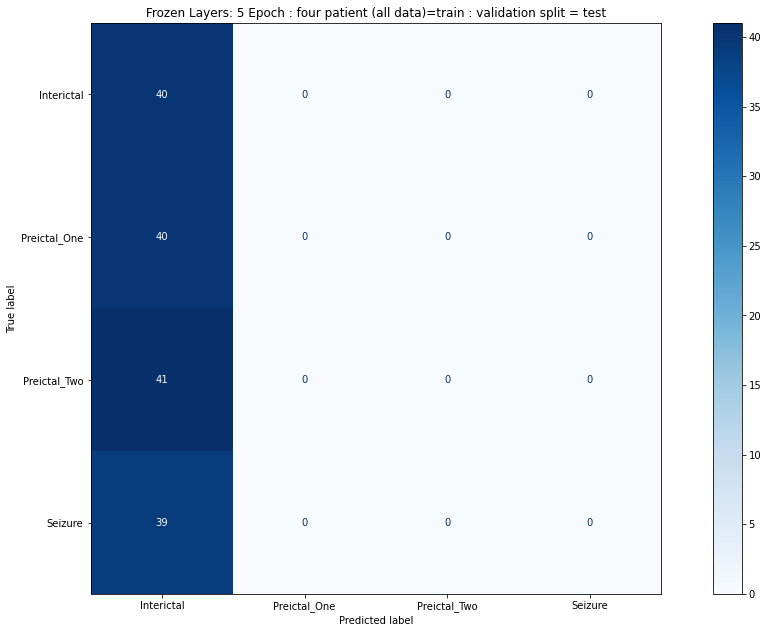

In [33]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=labels).plot(cmap='Blues')
plt.title("Frozen Layers: 5 Epoch : four patient (all data)=train : validation split = test")
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.savefig("hi2.png")